In [1]:
from google.colab import files
uploaded = files.upload()

Saving 99300254-c22b-4964-be56-87741c90531e.png to 99300254-c22b-4964-be56-87741c90531e (1).png


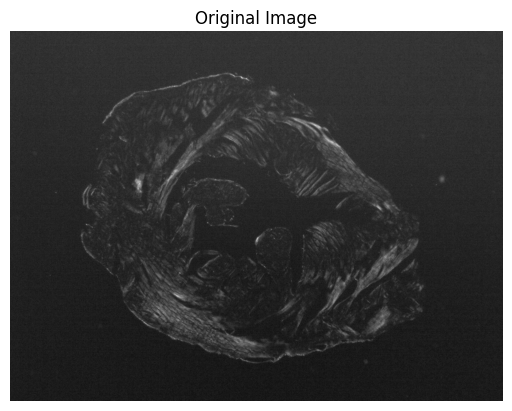

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("99300254-c22b-4964-be56-87741c90531e.png", 0)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

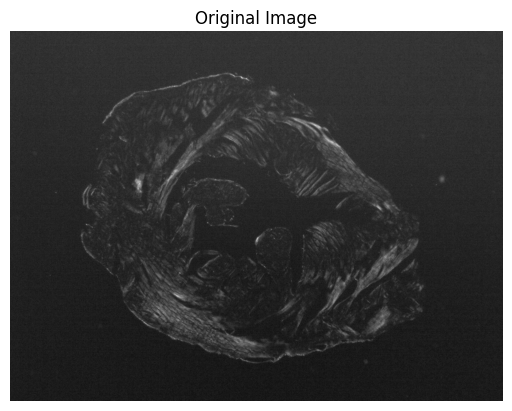

In [4]:
# Load the image (use your actual file name here)
img = cv2.imread("99300254-c22b-4964-be56-87741c90531e.png", 0)   # 0 = grayscale

# Display the image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

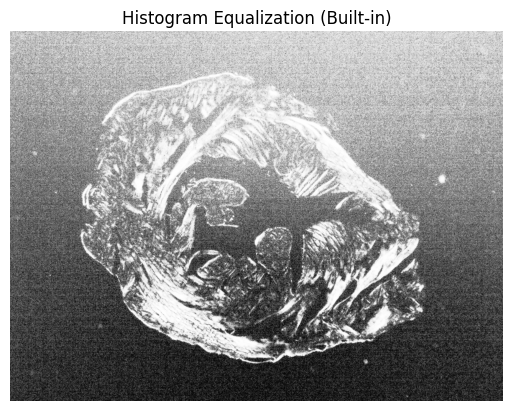

In [5]:
# Built-in Histogram Equalization
heq_builtin = cv2.equalizeHist(img)

# Display result
plt.imshow(heq_builtin, cmap='gray')
plt.title("Histogram Equalization (Built-in)")
plt.axis("off")
plt.show()


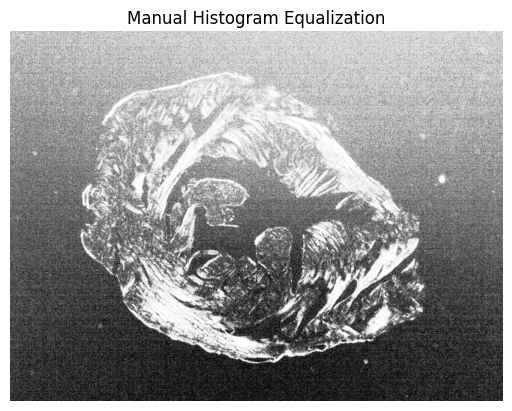

In [6]:
def manual_histogram_equalization(img):
    # Step 1 — Histogram
    hist, bins = np.histogram(img.flatten(), 256, [0,256])

    # Step 2 — PDF (probability density function)
    pdf = hist / img.size

    # Step 3 — CDF (cumulative distribution function)
    cdf = pdf.cumsum()

    # Step 4 — Normalize CDF to range [0,255]
    cdf_normalized = (cdf * 255).astype('uint8')

    # Step 5 — Map pixels using the new intensity values
    img_heq = cdf_normalized[img]

    return img_heq

# Apply manual HE
heq_manual = manual_histogram_equalization(img)

# Display result
plt.imshow(heq_manual, cmap='gray')
plt.title("Manual Histogram Equalization")
plt.axis("off")
plt.show()


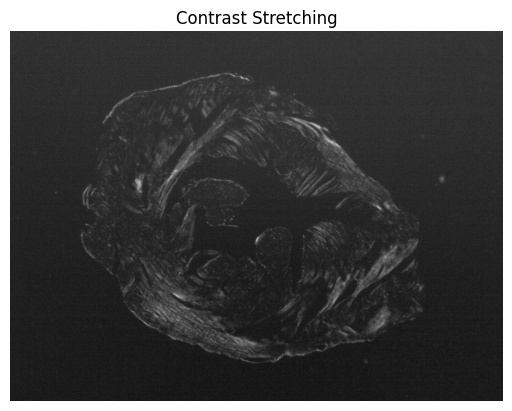

In [7]:
def contrast_stretch(img):
    # Find minimum and maximum pixel values
    r_min = np.min(img)
    r_max = np.max(img)

    # Apply contrast stretching formula
    stretched = (img - r_min) * (255 / (r_max - r_min))

    # Convert to proper pixel format
    stretched = np.clip(stretched, 0, 255).astype('uint8')

    return stretched

# Apply contrast stretching
contrast_img = contrast_stretch(img)

# Display result
plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")
plt.show()


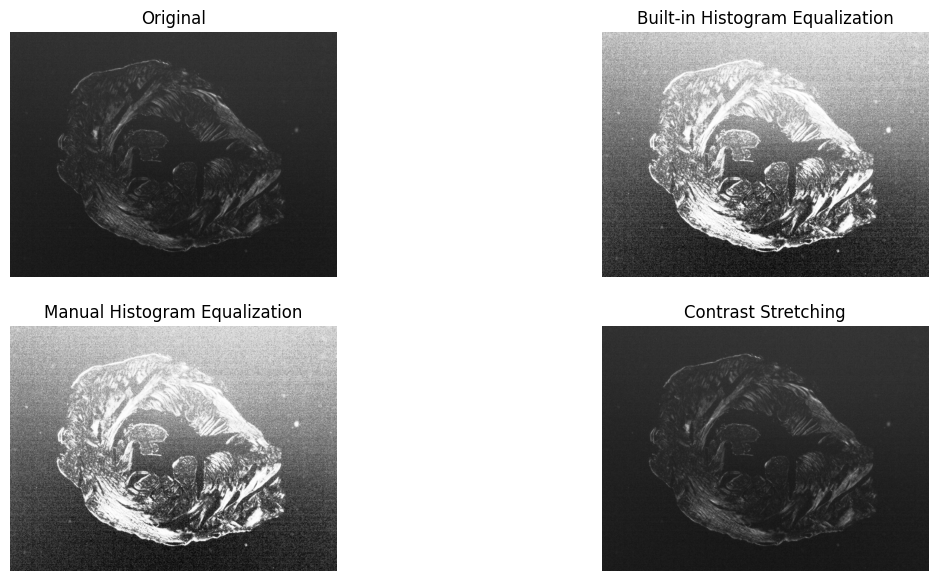

In [8]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(heq_builtin, cmap='gray')
plt.title("Built-in Histogram Equalization")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(heq_manual, cmap='gray')
plt.title("Manual Histogram Equalization")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")

plt.show()
